In [13]:
import numpy as np
import figure_options
from figure_options import plt, sns, rc_parameters
from tqdm import tqdm
from baifg.utils.characteristic_time import compute_characteristic_time_gaussian
from baifg.utils.graphs import make_loopless_clique


In [4]:
eps = 1e-2
N = 100
kvalues = np.array([5, 10, 15])
pvalues = np.linspace(eps, 1, N)
Tvalues = np.zeros((N, len(kvalues)))

for pi, p in enumerate(tqdm(pvalues)):
    for ki, k in enumerate(kvalues):
        fg = make_loopless_clique(p, np.linspace(0, 1, k))
        sol = compute_characteristic_time_gaussian(fg)
        Tvalues[pi, ki] = sol.value


  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:27,  3.58it/s]c:\Users\arusso2\github\Best-Arm-Identification-with-Feedback-Graph\.venv\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 100/100 [00:26<00:00,  3.71it/s]


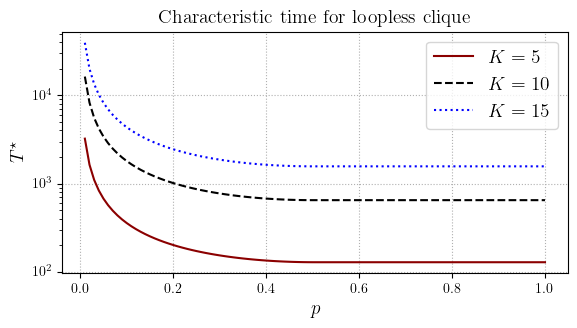

In [5]:
fig = plt.figure(figsize=(6,3.5))
plt.plot(pvalues, Tvalues[:,0],  'darkred', label=r'$K=5$')
plt.plot(pvalues, Tvalues[:,1], '--', color='black', label=r'$K=10$')
plt.plot(pvalues, Tvalues[:,2],  ':', color='blue',label=r'$K=15$')
# p0 =pvalues[np.argwhere(np.abs(Tvalues1- Tvalues2) < 1e-3)[0]]
# plt.axvline(x=p0.item(), color='black', linestyle=':')

# plt.text(p0.item()*1.15, 40, f'$p_0 = {p0.item():.2f}$')

plt.yscale('log')
plt.xlabel(r'$p$')
plt.ylabel(r'$T^\star$')
plt.legend()
plt.grid(linestyle = ":")
plt.title("Characteristic time for loopless clique")
plt.tight_layout()
plt.savefig('figures/examples/characteristic_time_looplessclique.pdf', bbox_inches='tight')

In [6]:
def plot_w(solutions0, xticks):
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(1,1, figsize=(6,3))
    x = np.arange(solutions0.shape[0])
    for idx, solutions in enumerate([solutions0]):
        for i in range(solutions.shape[1]):
            ax.bar(x + i*width, solutions[:, i], width, label=f'$w_{i+1}^\star$')

        # Add labels, title, and custom x-axis tick labels
        ax.set_xlabel(r'$p$')
        
        ax.set_title(f'Loopless clique' )
        ax.set_xticks(x + width*2)
        ax.set_xticklabels(xticks)
    ax.set_ylabel(r'$w^\star$')
    ax.legend(handlelength=1, bbox_to_anchor=(1.25, 1.05))


    plt.tight_layout()
    plt.savefig('figures/examples/allocations_looplessclique.pdf', bbox_inches='tight')

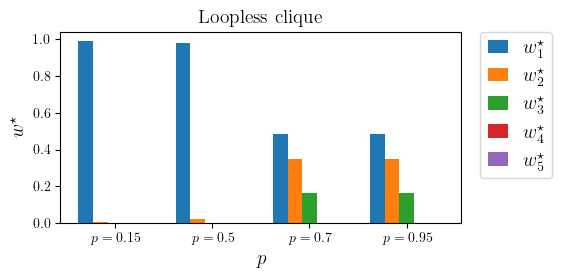

In [12]:

sol0 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.15, mu=np.linspace(0, 1, 5)))
sol1 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.5, mu=np.linspace(0, 1, 5)))
sol2 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.7, mu=np.linspace(0, 1, 5)))
sol3 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.95, mu=np.linspace(0, 1, 5)))
solutions = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar, sol2.wstar])



plot_w(solutions,['$p=0.15$','$p=0.5$', '$p=0.7$', '$p=0.95$'])

